# Analyzing NKE Using CAPM

In this project we will be using the Capital Asset Pricing Model (CAPM) to analyze Nike. CAPM is a model that describes the relationship between systematic risk and expected return of an asset. The formula is given below: 

Expected Return = Risk-free Rate + Beta(Expected Market Return - Risk-free Rate)

This looks very much like linear regression, and in fact we will be doing a regression analysis on Nike by comparing it with S&P 500 (market benchmark). 

In order to make things simple, the CSV files of both Nike and S&P 500 are available in this repo for download. The files include a one-month data for both (April to May 2018). 

First we will make the required imports. In this project we will only be using pandas to create our dataframe and analysis and statsmodels for the linear regression.

In [67]:
import pandas as pd 
import statsmodels.api as sm

Now we will load both CSV files by reading them using pandas. Note that we will be using the "Date" column as an index

In [86]:
# Load Nike Data
nike = pd.read_csv('NKE.csv', parse_dates = True, index_col = 'Date')

# Load S&P 500 Data
spy = pd.read_csv('^GSPC.csv', parse_dates = True, index_col = 'Date')

We can check both dataframes to see what they look like. We will be printing the first 5 rows of each dataframe.

In [87]:
nike.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-04-13  68.120003  68.330002  66.980003  67.250000  67.250000  4300200
2018-04-16  67.809998  67.980003  67.059998  67.059998  67.059998  6484400
2018-04-17  67.370003  67.669998  67.279999  67.510002  67.510002  5605700
2018-04-18  67.529999  67.739998  66.160004  66.199997  66.199997  7384000
2018-04-19  66.029999  66.300003  64.989998  65.730003  65.730003  8274300

In [88]:
spy.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-04-13  2676.899902  2680.260010  2645.050049  2656.300049  2656.300049   
2018-04-16  2670.100098  2686.489990  2665.159912  2677.840088  2677.840088   
2018-04-17  2692.739990  2713.340088  2692.050049  2706.389893  2706.389893   
2018-04-18  2710.110107  2717.489990  2703.629883  2708.639893  2708.639893   
2018-04-19  2701.159912  2702.840088  2681.899902  2693.129883  2693.129883   

                Volume  
Date                    
2018-04-13  2960910000  
2018-04-16  3019700000  
2018-04-17  3234360000  
2018-04-18  3383410000  
2018-04-19  3349370000

In order to do our CAPM analysis using linear regression, the only columns we need from both dataframes are the "Adjusted Close" price columns. So what we are going to do is to only take these columns and put them in a new dataframe through "concatenation".

In [89]:
# Concatenate Adj Close columns in both dataframes
df = pd.concat([nike['Close'], spy['Close']], axis=1)

# Name the columns 
df.columns = ['NKE', 'SPY']

# Let's check the data 
df.head()

NKE          SPY
Date                              
2018-04-13  67.250000  2656.300049
2018-04-16  67.059998  2677.840088
2018-04-17  67.510002  2706.389893
2018-04-18  66.199997  2708.639893
2018-04-19  65.730003  2693.129883

However, we are not done yet. The data that is required for our CAPM analysis must be in the form of percentage returns (since we want to know the expected returns of a particular stock). We can do this easily by using the "pct_change" module in pandas:

In [90]:
returns = df.pct_change()

# Let's check the data
returns.head()

NKE       SPY
Date                          
2018-04-13       NaN       NaN
2018-04-16 -0.002825  0.008109
2018-04-17  0.006710  0.010662
2018-04-18 -0.019405  0.000831
2018-04-19 -0.007100 -0.005726

One final touch: We see that the first row is NaN. This is because in order to calculate the percentage returns we need at least 2 days of data to make the comparison. However, we do not have any row above the first row inside any of our CSV files. In order to not let it interfere with our analysis, we will use the "dropna" module in pandas to remove values that are missing inside the dataframe.

In [91]:
returns = returns.dropna(axis = 0)

# Let's check the data
returns.head()

NKE       SPY
Date                          
2018-04-16 -0.002825  0.008109
2018-04-17  0.006710  0.010662
2018-04-18 -0.019405  0.000831
2018-04-19 -0.007100 -0.005726
2018-04-20  0.005477 -0.008537

We are finally ready to perform our analysis. Recall that the dependent variable in our case is the expected returns of Nike, while the independent variable is the market benchmark (S&P 500). 

If you recall the formula for linear regression, we also need to include a constant (Alpha) inside, and that is why we will be using statsmodels to add constants to each return of S&P 500. The effects of adding constants are printed below:

In [92]:
y = returns['NKE']
x = returns['SPY']
x1 = sm.add_constant(x)

# Show the effect of adding constants using statsmodels (add a column of 1s to the dataframe)
print("sm.add_constant Effect: ")
print(x1[:5]) # Only print the first 5 rows

sm.add_constant Effect: 
            const       SPY
Date                       
2018-04-16    1.0  0.008109
2018-04-17    1.0  0.010662
2018-04-18    1.0  0.000831
2018-04-19    1.0 -0.005726
2018-04-20    1.0 -0.008537


Finally, the method for performing linear regression in statsmodels is called the "Ordinary Least Squares" (OLS). We will perform them using NKE (y) as the dependent variable and the modified S&P 500 (x1) as the independent variable. 

We will then fit the results into a variable and print a summary of it to see what we get. 

In [93]:
linreg = sm.OLS(y, x1)

# Put results of linear regression inside 
results = linreg.fit()

# Get summary of our results printed 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NKE   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.222
Date:                Wed, 30 May 2018   Prob (F-statistic):              0.153
Time:                        17:09:26   Log-Likelihood:                 60.166
No. Observations:                  20   AIC:                            -116.3
Df Residuals:                      18   BIC:                            -114.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.003      0.056      0.956      -0.006       0.006
SPY            0.5842      0.392      1.491      0.153      -0.239       1.407
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.158
Skew:                          -0.001   Prob(JB):                        0.560
Kurtosis:                       1.821   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So here we see that the Beta value of this formula is 0.5842 (shown in the table with "coeff" information) and the Alpha is 0.0002 ("constant").

Let's compare it to a screenshot from Yahoo Finance: 

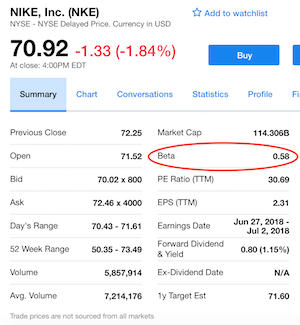

In [96]:
from IPython.display import Image
Image("nike.png")

©Regio Abundan. May 30th 2018.